Featurization and Model tuning



Importing the necessary libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.model_selection  import train_test_split
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy import stats
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve, auc
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA, IncrementalPCA

%matplotlib inline
sns.set(color_codes=True)

Import the data

In [ ]:

df=pd.read_csv('/content/drive/MyDrive/csv/signal-data.csv')
df.drop('Time',axis=1,inplace= True)

In [ ]:
df.head()

0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...       581     582     583     584      585     586  \
0  1.5005  0.0162  ...       NaN  0.5005  0.0118  0.0035   2.3630     NaN   
1  1.4966 -0.0005  ...  208.2045  0.5019  0.0223  0.0055   4.4447  0.0096   
2  1.4436  0.0041  ...   82.8602  0.4958  0.0157  0.0039   3.1745  0.0584   
3  1.4882 -0.0124  ...   73.8432  0.4990  0.0103  0.0025   2.0544  0.0202   
4  1.5031 -0.0031  ...       NaN  0.4800  0.4766  0.1045  99.3032  0.0202   

      587     588       589  Pass/Fail  
0     NaN     NaN       NaN         -1  
1  0.0201  0.0060  208.2045         -1  
2  0.0484  0.0148   82.8602          1  
3  0.0149  0.0044   73.8432         -1  
4  0.0149  0.0044   73.8432         -1  

[5 rows x 591 columns]


Exploring the data

In [ ]:
print('The size of the data:', df.size)
print('No of rows in the data:', df.shape[0])
print('No of columns in the data:', df.shape[1])

The size of the data: 926097
No of rows in the data: 1567
No of columns in the data: 591


Treating Missing values

In [ ]:
df.apply(pd.to_numeric)

0        1          2          3       4      5         6       7  \
0     3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1     3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2     2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3     2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4     3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   
...       ...      ...        ...        ...     ...    ...       ...     ...   
1562  2899.41  2464.36  2179.7333  3085.3781  1.4843  100.0   82.2467  0.1248   
1563  3052.31  2522.55  2198.5667  1124.6595  0.8763  100.0   98.4689  0.1205   
1564  2978.81  2379.78  2206.3000  1110.4967  0.8236  100.0   99.4122  0.1208   
1565  2894.92  2532.01  2177.0333  1183.7287  1.5726  100.0   98.7978  0.1213   
1566  2944.92  2450.76  2195.4444  2914.1792  1.5978  100.0   85.1011  0.1235   

           8       9  ...       581     582     583     584      585     586  \
0     1.5005  0.0162  ...       NaN  0.5005  0.0118  0.0035   2.3630     NaN   
1     1.4966 -0.0005  ...  208.2045  0.5019  0.0223  0.0055   4.4447  0.0096   
2     1.4436  0.0041  ...   82.8602  0.4958  0.0157  0.0039   3.1745  0.0584   
3     1.4882 -0.0124  ...   73.8432  0.4990  0.0103  0.0025   2.0544  0.0202   
4     1.5031 -0.0031  ...       NaN  0.4800  0.4766  0.1045  99.3032  0.0202   
...      ...     ...  ...       ...     ...     ...     ...      ...     ...   
1562  1.3424 -0.0045  ...  203.1720  0.4988  0.0143  0.0039   2.8669  0.0068   
1563  1.4333 -0.0061  ...       NaN  0.4975  0.0131  0.0036   2.6238  0.0068   
1564     NaN     NaN  ...   43.5231  0.4987  0.0153  0.0041   3.0590  0.0197   
1565  1.4622 -0.0072  ...   93.4941  0.5004  0.0178  0.0038   3.5662  0.0262   
1566     NaN     NaN  ...  137.7844  0.4987  0.0181  0.0040   3.6275  0.0117   

         587     588       589  Pass/Fail  
0        NaN     NaN       NaN         -1  
1     0.0201  0.0060  208.2045         -1  
2     0.0484  0.0148   82.8602          1  
3     0.0149  0.0044   73.8432         -1  
4     0.0149  0.0044   73.8432         -1  
...      ...     ...       ...        ...  
1562  0.0138  0.0047  203.1720         -1  
1563  0.0138  0.0047  203.1720         -1  
1564  0.0086  0.0025   43.5231         -1  
1565  0.0245  0.0075   93.4941         -1  
1566  0.0162  0.0045  137.7844         -1  

[1567 rows x 591 columns]

In [ ]:
df.isnull().sum()

0             6
1             7
2            14
3            14
4            14
             ..
586           1
587           1
588           1
589           1
Pass/Fail     0
Length: 591, dtype: int64

Filling the missing values with median values

In [ ]:

medianFiller = lambda x: x.fillna(x.median())

df = df.apply(medianFiller,axis=0).astype('float64')
df.isnull().sum()


0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64

In [ ]:
df.head()


0        1          2          3       4      5         6       7  \
0  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   97.6133  0.1242   
1  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0  102.3433  0.1247   
2  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   95.4878  0.1241   
3  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0  104.2367  0.1217   
4  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0  100.3967  0.1235   

        8       9  ...       581     582     583     584      585     586  \
0  1.5005  0.0162  ...   72.2889  0.5005  0.0118  0.0035   2.3630  0.0205   
1  1.4966 -0.0005  ...  208.2045  0.5019  0.0223  0.0055   4.4447  0.0096   
2  1.4436  0.0041  ...   82.8602  0.4958  0.0157  0.0039   3.1745  0.0584   
3  1.4882 -0.0124  ...   73.8432  0.4990  0.0103  0.0025   2.0544  0.0202   
4  1.5031 -0.0031  ...   72.2889  0.4800  0.4766  0.1045  99.3032  0.0202   

      587     588       589  Pass/Fail  
0  0.0148  0.0046   71.9005       -1.0  
1  0.0201  0.0060  208.2045       -1.0  
2  0.0484  0.0148   82.8602        1.0  
3  0.0149  0.0044   73.8432       -1.0  
4  0.0149  0.0044   73.8432       -1.0  

[5 rows x 591 columns]

In [ ]:
df.columns[df.isna().any()].tolist()


[]

Splitting the original data into two parts, the dataset df3 will serve as test data later once the best parameters for the algorithm are found

In [ ]:

df3=df.copy(deep=True)
df3=df.iloc[1067:]
print('The size of the Test data:', df3.size)
print('No of rows in the Test data:', df3.shape[0])
print('No of columns in the Test data:', df3.shape[1])


The size of the Test data: 295500
No of rows in the Test data: 500
No of columns in the Test data: 591


In [ ]:
df=df.iloc[:1067]
print('The size of the  data:', df.size)
print('No of rows in the  data:', df.shape[0])
print('No of columns in the  data:', df.shape[1])


The size of the  data: 630597
No of rows in the  data: 1067
No of columns in the  data: 591


Five point summary

In [ ]:

five_point=df.describe().T
five_point[['min','25%','50%','75%','max']]

min        25%        50%        75%        max
0          2743.2400  2966.9900  3009.4000  3055.0400  3266.0400
1          2158.7500  2449.6600  2497.5600  2537.9750  2846.4400
2          2060.6600  2180.5556  2200.0666  2218.0555  2315.2667
3           847.7976  1070.0439  1285.2144  1593.1220  3715.0417
4             0.6815     1.0177     1.3101     1.4887     3.8894
...              ...        ...        ...        ...        ...
586          -0.0042     0.0128     0.0202     0.0275     0.0584
587           0.0042     0.0107     0.0149     0.0205     0.0607
588           0.0015     0.0034     0.0046     0.0065     0.0188
589           0.0000    44.8134    73.6411   114.7497   706.8240
Pass/Fail    -1.0000    -1.0000    -1.0000    -1.0000     1.0000

[591 rows x 5 columns]

Correlations


There are hundreds of columns and only few have influence over the target variable. Rather than using all the attributes, choosing the ones that have high correlation with the target variable is better because using all attributes can increase the algorithm complexity


In [ ]:
correlation_values=df.corr()['Pass/Fail']
correlation_values.abs().sort_values(ascending=False)


Pass/Fail    1.000000
59           0.181251
431          0.130698
21           0.126718
430          0.125470
               ...   
534               NaN
535               NaN
536               NaN
537               NaN
538               NaN
Name: Pass/Fail, Length: 591, dtype: float64

Choosing the attributes that have a correlation value of greater than 0.095


In [ ]:
df2=df.copy(deep=True)
df2=df2[['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163','Pass/Fail']]
print('No of rows in the data:', df2.shape[0])
print('No of columns in the data:', df2.shape[1])


No of rows in the data: 1067
No of columns in the data: 16


<Axes: title={'center': 'Correlation of Attributes'}>

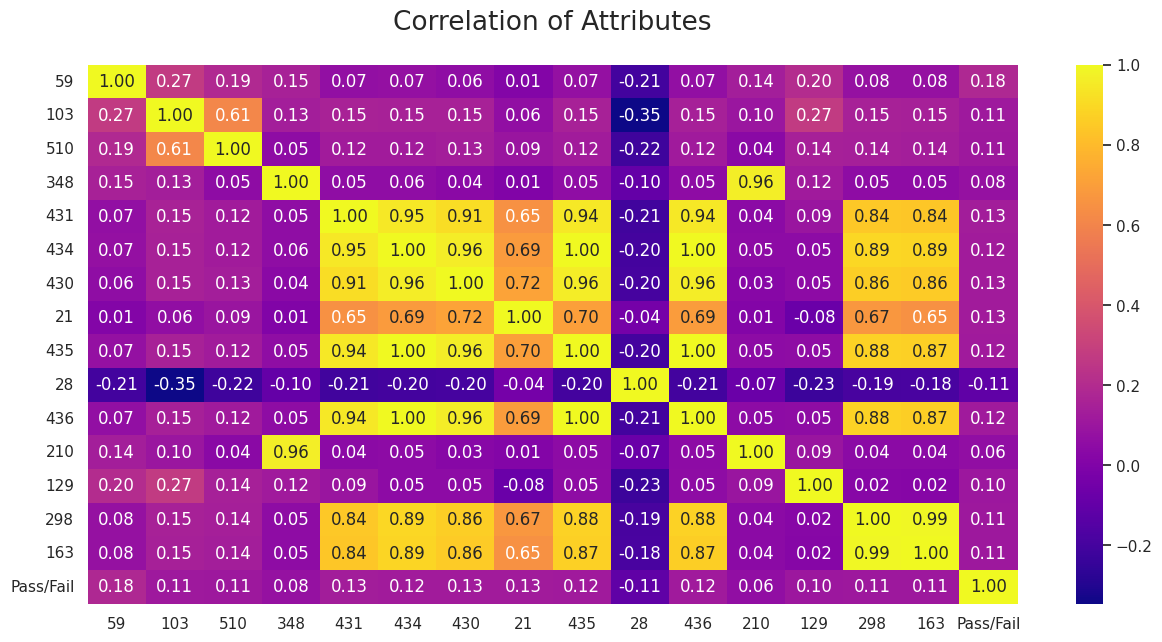

In [ ]:
plt.figure(figsize = (15,7))
plt.title('Correlation of Attributes', y=1.05, size=19)
sns.heatmap(df2.corr(), cmap='plasma',annot=True, fmt='.2f')

Data Visualization


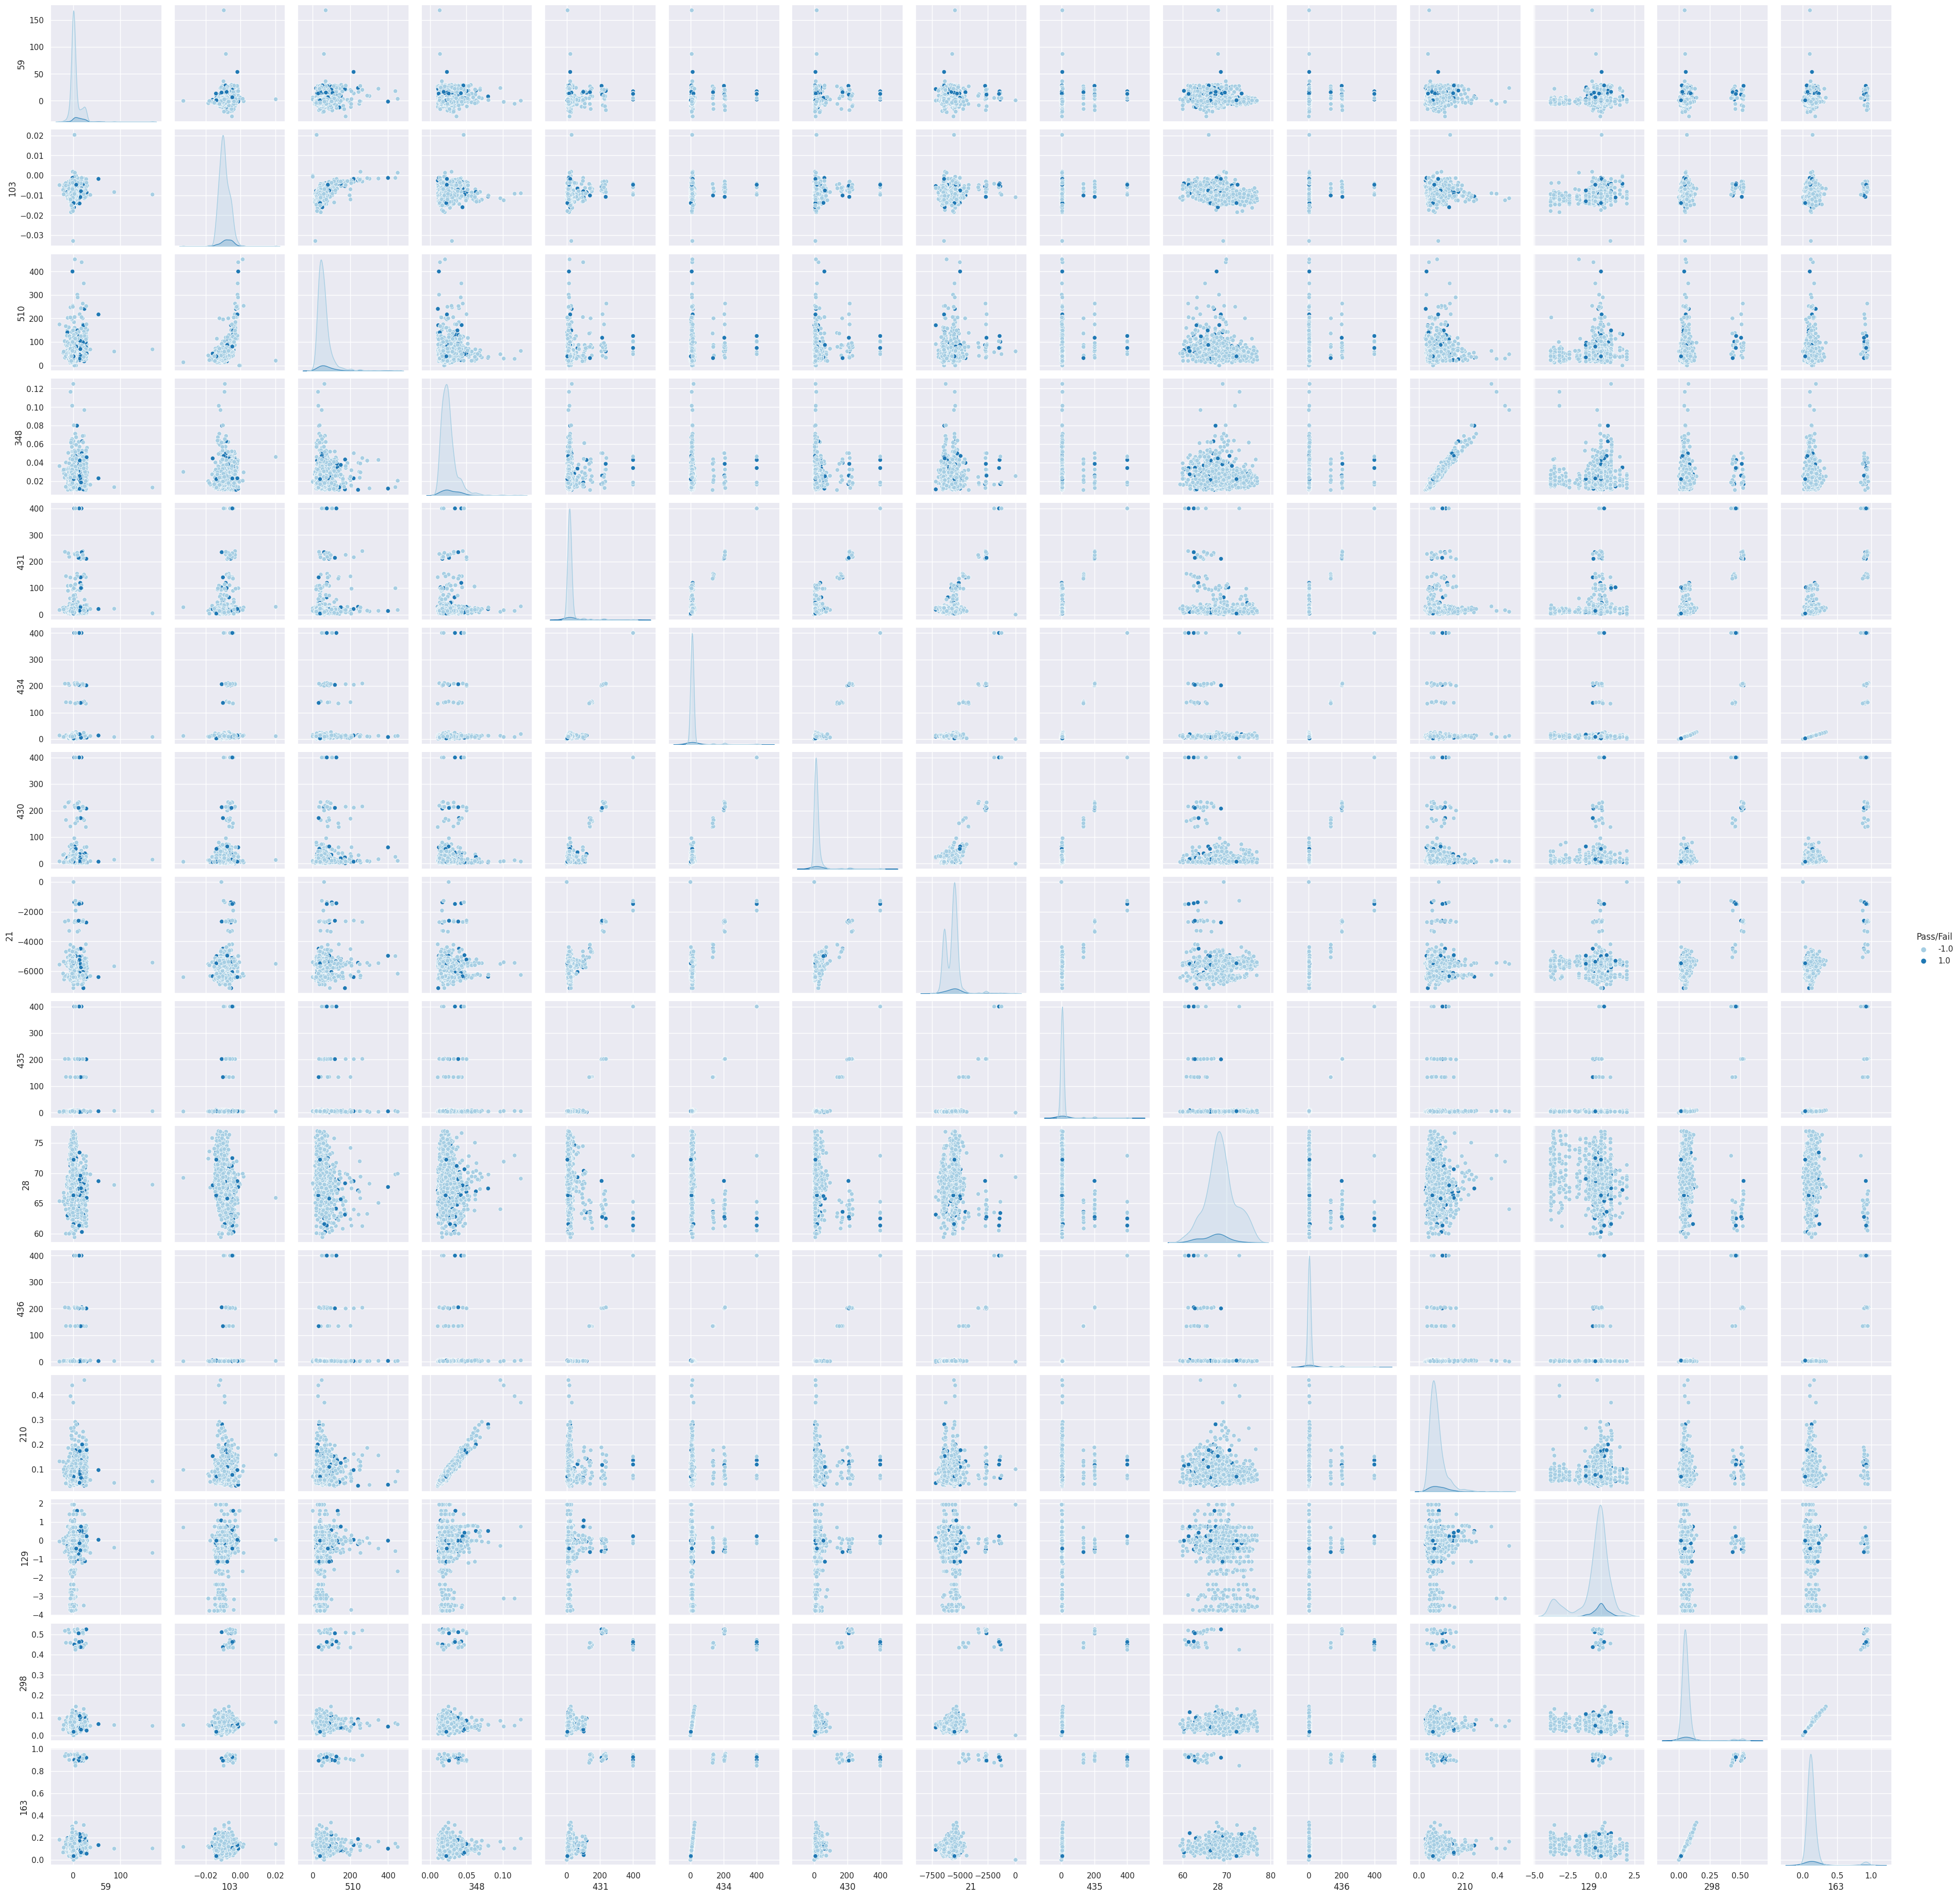

In [ ]:
sns.pairplot(df2, hue='Pass/Fail' , diag_kind = 'kde', palette="Paired")


Observation


From the scatter plots it can be understood that there are no postive or negative trends, which means the variables are less dependent on each other.
Most of the attributes are either left or right skewed


In [ ]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]


min         25%        50%         75%       max
59          -28.9882    -0.98045     1.7991     6.34000  168.1455
103          -0.0329    -0.01120    -0.0095    -0.00715    0.0203
510           0.0000    37.31615    51.2418    68.82720  451.4851
348           0.0103     0.01820     0.0232     0.02890    0.1251
431           0.0000    12.24740    17.5311    22.41550  400.0000
434           0.0000     7.80065    10.3414    12.82455  400.0000
430           0.0000     6.65890    10.2500    17.08940  400.0000
21        -7150.2500 -6279.25000 -5563.5000 -5397.37500    0.0000
435           0.0000     3.56125     4.5015     5.59565  400.0000
28           59.4000    66.64445    68.3444    70.32775   76.9667
436           0.0000     1.90720     2.7292     3.66030  400.0000
210           0.0319     0.06540     0.0819     0.10405    0.4590
129          -3.7790    -0.56770    -0.0946     0.09460    1.9390
298           0.0000     0.04080     0.0518     0.06635    0.5264
163           0.0000     0.09100     0.1180     0.14900    0.9570
Pass/Fail    -1.0000    -1.00000    -1.0000    -1.00000    1.0000

In [ ]:
df2.dtypes


59           float64
103          float64
510          float64
348          float64
431          float64
434          float64
430          float64
21           float64
435          float64
28           float64
436          float64
210          float64
129          float64
298          float64
163          float64
Pass/Fail    float64
dtype: object

In [ ]:
df2.nunique()


59           1035
103           142
510          1034
348           337
431          1056
434          1048
430          1057
21            933
435          1039
28            688
436          1053
210           687
129            67
298           578
163           237
Pass/Fail       2
dtype: int64

Most of the attributes are continuous where as the target variable is binary

<Axes: xlabel='Pass/Fail', ylabel='count'>

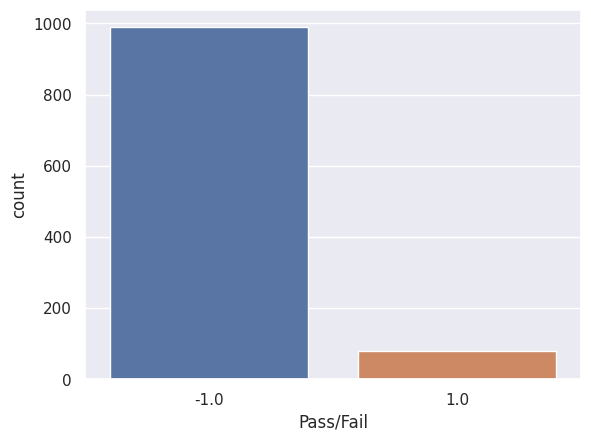

In [ ]:
sns.countplot(x='Pass/Fail',data=df2)

From the plot, it can be understood that there is an imbalance in the dataset

Upsampling the dataset using SMOTE


In [ ]:
#!pip install imblearn
from imblearn.over_sampling import SMOTE
df2[~df2.applymap(np.isreal).all(1)]


Empty DataFrame
Columns: [59, 103, 510, 348, 431, 434, 430, 21, 435, 28, 436, 210, 129, 298, 163, Pass/Fail]
Index: []

In [ ]:
df2.groupby(["Pass/Fail"]).count()


59  103  510  348  431  434  430   21  435   28  436  210  129  \
Pass/Fail                                                                    
-1.0       989  989  989  989  989  989  989  989  989  989  989  989  989   
 1.0        78   78   78   78   78   78   78   78   78   78   78   78   78   

           298  163  
Pass/Fail            
-1.0       989  989  
 1.0        78   78

In [ ]:
x=df2.copy(deep=True)
x.drop(['Pass/Fail'],axis=1,inplace=True)
y=df2[['Pass/Fail']]
print('No of rows in the data:', x.shape[0])
print('No of columns in the data:', x.shape[1])
print('No of rows in the data:', y.shape[0])
print('No of columns in the data:', y.shape[1])


No of rows in the data: 1067
No of columns in the data: 15
No of rows in the data: 1067
No of columns in the data: 1


In [ ]:
x=x.to_numpy()
y=y.to_numpy()

type(x)

numpy.ndarray

In [ ]:

print("Before UpSampling, counts of label '1': {}".format(sum(y==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
x, y = sm.fit_resample(x, y.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))



print('After UpSampling, the shape of train_X: {}'.format(x.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y.shape))


Before UpSampling, counts of label '1': [78]
Before UpSampling, counts of label '-1': [989] 

After UpSampling, counts of label '1': 989
After UpSampling, counts of label '-1': 989 

After UpSampling, the shape of train_X: (1978, 15)
After UpSampling, the shape of train_y: (1978,) 



In [ ]:
print('x  data {}'.format(x.shape))
print('y  data {}'.format(y.shape))


x  data (1978, 15)
y  data (1978,)


In [ ]:
X_df=pd.DataFrame(x, columns = ['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163'])
five_point=X_df.describe().T
five_point[['min','25%','50%','75%','max']]


min          25%          50%          75%       max
59    -28.9882     0.953625     5.359463    14.386367  168.1455
103    -0.0329    -0.010700    -0.008800    -0.006522    0.0203
510     0.0000    41.352663    56.694550    75.533303  451.4851
348     0.0103     0.019500     0.024800     0.032500    0.1251
431     0.0000    13.806500    18.424470    23.387650  400.0000
434     0.0000     8.162069    10.973852    13.457366  400.0000
430     0.0000     7.222973    11.439614    18.410898  400.0000
21  -7150.2500 -6107.988516 -5513.743778 -5336.812500    0.0000
435     0.0000     3.731640     4.620702     5.557075  400.0000
28     59.4000    66.257183    67.953894    69.525326   76.9667
436     0.0000     2.013875     2.738665     3.697475  400.0000
210     0.0319     0.069405     0.088080     0.114835    0.4590
129    -3.7790    -0.412225    -0.014689     0.167748    1.9390
298     0.0000     0.043008     0.054865     0.073400    0.5264
163     0.0000     0.096000     0.127000     0.159372    0.9570

In [ ]:
five_point=df2.describe().T
five_point[['min','25%','50%','75%','max']]


min         25%        50%         75%       max
59          -28.9882    -0.98045     1.7991     6.34000  168.1455
103          -0.0329    -0.01120    -0.0095    -0.00715    0.0203
510           0.0000    37.31615    51.2418    68.82720  451.4851
348           0.0103     0.01820     0.0232     0.02890    0.1251
431           0.0000    12.24740    17.5311    22.41550  400.0000
434           0.0000     7.80065    10.3414    12.82455  400.0000
430           0.0000     6.65890    10.2500    17.08940  400.0000
21        -7150.2500 -6279.25000 -5563.5000 -5397.37500    0.0000
435           0.0000     3.56125     4.5015     5.59565  400.0000
28           59.4000    66.64445    68.3444    70.32775   76.9667
436           0.0000     1.90720     2.7292     3.66030  400.0000
210           0.0319     0.06540     0.0819     0.10405    0.4590
129          -3.7790    -0.56770    -0.0946     0.09460    1.9390
298           0.0000     0.04080     0.0518     0.06635    0.5264
163           0.0000     0.09100     0.1180     0.14900    0.9570
Pass/Fail    -1.0000    -1.00000    -1.0000    -1.00000    1.0000

From comparing the Five point summary of the train data and original data, we can see that they are entirely different after upsampling


Using KNN for the classification problem
Without Cross Validation


Standardising the data


Accurancy : 0.8535353535353535
KNN TRAIN score :  0.8880057803468208
KNN TEST score :  0.8535353535353535

[[217  83]
 [  4 290]]

 True Possitive   =  290
True Negative     =  217
False Possive     =  83
False Negative    =  4


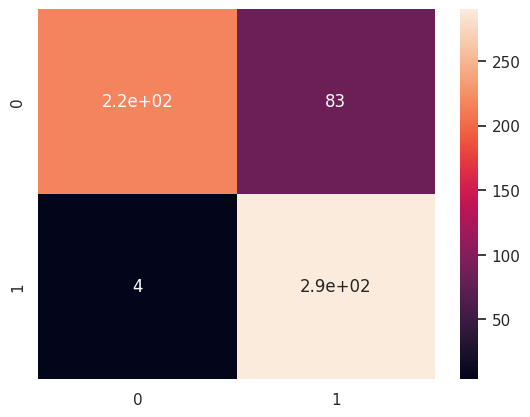

AUC score: 0.9285600907029479


In [ ]:
x=X_df.apply(zscore)
X_train_res, X_test, y_train_res, y_test = train_test_split(x, y, test_size=0.30, random_state=5)
knn=KNeighborsClassifier()
knn.fit(X_train_res,y_train_res)
KNeighborsClassifier()
y_pred=knn.predict(X_test)
y_proba=knn.predict_proba(X_test)

print('Accurancy :',accuracy_score(y_test, y_pred))
print("KNN TRAIN score : ",format(knn.score(X_train_res, y_train_res)))
print("KNN TEST score : ",format(knn.score(X_test, y_test)))
print()

cm=metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('\n True Possitive   = ',cm[1][1])
print('True Negative     = ',cm[0][0])
print('False Possive     = ',cm[0][1])
print('False Negative    = ',cm[1][0])
sns.heatmap(cm,annot=True)
plt.show()



false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,y_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

print('AUC score:', roc_auc)


In [ ]:
print('\nLogistic Regression Report : \n',metrics.classification_report(y_test,y_pred))
conf_table = cm
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy   : ",round(a,2))
print("precision : ",round(p,2))
print("recall     : ",round(r,2))
print("F1 score   : ",round(f,2))



Logistic Regression Report : 
               precision    recall  f1-score   support

        -1.0       0.98      0.72      0.83       300
         1.0       0.78      0.99      0.87       294

    accuracy                           0.85       594
   macro avg       0.88      0.85      0.85       594
weighted avg       0.88      0.85      0.85       594

Accuracy   :  0.85
precision :  0.78
recall     :  0.99
F1 score   :  0.87


The accuracy is around 85%, using cross validation might improve the score


With cross validation


In [ ]:
num_folds = 60
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = KNeighborsClassifier()
results = cross_val_score(model, x,y, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.84848485 0.93939394 0.81818182 0.87878788 0.87878788 0.87878788
 0.75757576 0.90909091 0.81818182 0.75757576 0.84848485 0.84848485
 0.84848485 0.84848485 0.84848485 0.90909091 0.84848485 0.84848485
 0.87878788 0.84848485 0.87878788 0.84848485 0.78787879 0.78787879
 0.90909091 0.84848485 0.87878788 0.81818182 0.87878788 0.81818182
 0.87878788 0.96969697 0.90909091 0.72727273 0.75757576 0.87878788
 0.96969697 0.90909091 0.96969697 0.87878788 0.84848485 0.81818182
 0.84848485 0.78787879 0.87878788 0.87878788 0.78787879 0.90909091
 0.87878788 0.90909091 0.90909091 0.81818182 0.90909091 0.84848485
 0.84848485 0.87878788 0.72727273 0.87878788 0.875      0.8125    ]
Accuracy: 85.691% (5.343%)


Using GridsearchCV to find best parameters


In [ ]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
gs = GridSearchCV(knn,param_grid,cv=10)
gs.fit(X_train_res, y_train_res)
GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})
gs.cv_results_['params']


[{'algorithm': 'auto', 'n_neighbors': 1},
 {'algorithm': 'auto', 'n_neighbors': 2},
 {'algorithm': 'auto', 'n_neighbors': 3},
 {'algorithm': 'auto', 'n_neighbors': 4},
 {'algorithm': 'auto', 'n_neighbors': 5},
 {'algorithm': 'auto', 'n_neighbors': 6},
 {'algorithm': 'auto', 'n_neighbors': 7},
 {'algorithm': 'auto', 'n_neighbors': 8},
 {'algorithm': 'ball_tree', 'n_neighbors': 1},
 {'algorithm': 'ball_tree', 'n_neighbors': 2},
 {'algorithm': 'ball_tree', 'n_neighbors': 3},
 {'algorithm': 'ball_tree', 'n_neighbors': 4},
 {'algorithm': 'ball_tree', 'n_neighbors': 5},
 {'algorithm': 'ball_tree', 'n_neighbors': 6},
 {'algorithm': 'ball_tree', 'n_neighbors': 7},
 {'algorithm': 'ball_tree', 'n_neighbors': 8},
 {'algorithm': 'kd_tree', 'n_neighbors': 1},
 {'algorithm': 'kd_tree', 'n_neighbors': 2},
 {'algorithm': 'kd_tree', 'n_neighbors': 3},
 {'algorithm': 'kd_tree', 'n_neighbors': 4},
 {'algorithm': 'kd_tree', 'n_neighbors': 5},
 {'algorithm': 'kd_tree', 'n_neighbors': 6},
 {'algorithm': 'kd

In [ ]:
gs.best_params_


{'algorithm': 'auto', 'n_neighbors': 2}

So the best parameters to use for KNN are auto for algorithm and 2 for n_neighbors


In [ ]:
gs.cv_results_['mean_test_score']


array([0.87717131, 0.88802002, 0.85692837, 0.87138463, 0.84028256,
       0.85617767, 0.83161297, 0.84387968, 0.87717131, 0.88802002,
       0.85692837, 0.87138463, 0.84028256, 0.85617767, 0.83161297,
       0.84387968, 0.87717131, 0.88802002, 0.85692837, 0.87138463,
       0.84028256, 0.85617767, 0.83161297, 0.84387968, 0.87717131,
       0.88802002, 0.85692837, 0.87138463, 0.84028256, 0.85617767,
       0.83161297, 0.84387968])

In [ ]:
print(" Best cross-validation accuracy: {:.2f}". format( gs.best_score_))


 Best cross-validation accuracy: 0.89


In [ ]:
print(" Test set accuracy: {:.2f}". format( gs.score(X_test, y_test)))


 Test set accuracy: 0.91


Using PCA


In [ ]:
df.isnull().sum()


0            0
1            0
2            0
3            0
4            0
            ..
586          0
587          0
588          0
589          0
Pass/Fail    0
Length: 591, dtype: int64

In [ ]:
x=df[['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163']]
y=df[['Pass/Fail']]


In [ ]:
x.columns

Index(['59', '103', '510', '348', '431', '434', '430', '21', '435', '28',
       '436', '210', '129', '298', '163'],
      dtype='object')

In [ ]:
x=x.apply(zscore)


In [ ]:
covMatrix = np.cov(x,rowvar=False)

In [ ]:

pca = PCA(n_components=15)


In [ ]:
pca.fit(x)

PCA(n_components=15)

In [ ]:
PCA(n_components=15)


PCA(n_components=15)

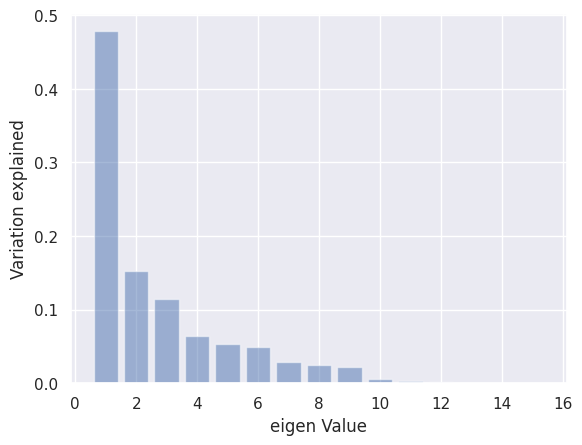

In [ ]:
plt.bar(list(range(1,16)),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()


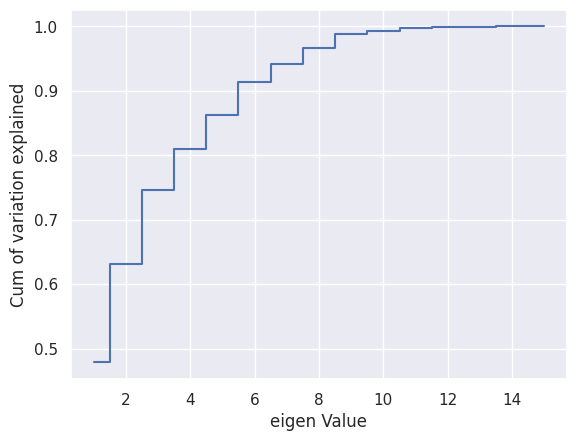

In [ ]:
plt.step(list(range(1,16)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()


In [ ]:
pca3 = PCA(n_components=9)
pca3.fit(x)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
xpca = pca3.transform(x)



[[ 3.96034405e-02  7.97198283e-02  6.97581427e-02  3.02245796e-02
   3.53280358e-01  3.66802494e-01  3.59857420e-01  2.79354961e-01
   3.65877748e-01 -9.27949958e-02  3.65560989e-01  2.59563253e-02
   2.64410186e-02  3.49122306e-01  3.46464194e-01]
 [ 3.16643842e-01  4.05120640e-01  3.17569722e-01  4.79376147e-01
  -2.79297113e-02 -4.03863615e-02 -4.86766950e-02 -1.05423755e-01
  -4.08866899e-02 -2.83672671e-01 -4.14688824e-02  4.62713689e-01
   2.97192263e-01 -3.58118183e-02 -3.86775090e-02]
 [-1.64899866e-01 -3.99768481e-01 -4.00962217e-01  5.07673259e-01
   1.18943244e-02  2.58551691e-02  1.33461571e-02  6.05063716e-02
   2.58188234e-02  2.59044294e-01  2.55270708e-02  5.28054570e-01
  -2.04730141e-01  1.63777106e-02  1.98689452e-02]
 [-2.87277734e-01  3.03741610e-01  5.51556595e-01  7.38654283e-02
  -6.74174080e-02 -3.61592801e-02 -1.36748363e-02  1.71135485e-01
  -3.39588690e-02  3.11826459e-01 -3.96718558e-02  8.49839291e-02
  -6.10392209e-01  1.52660039e-02  1.47659654e-02]
 [ 8

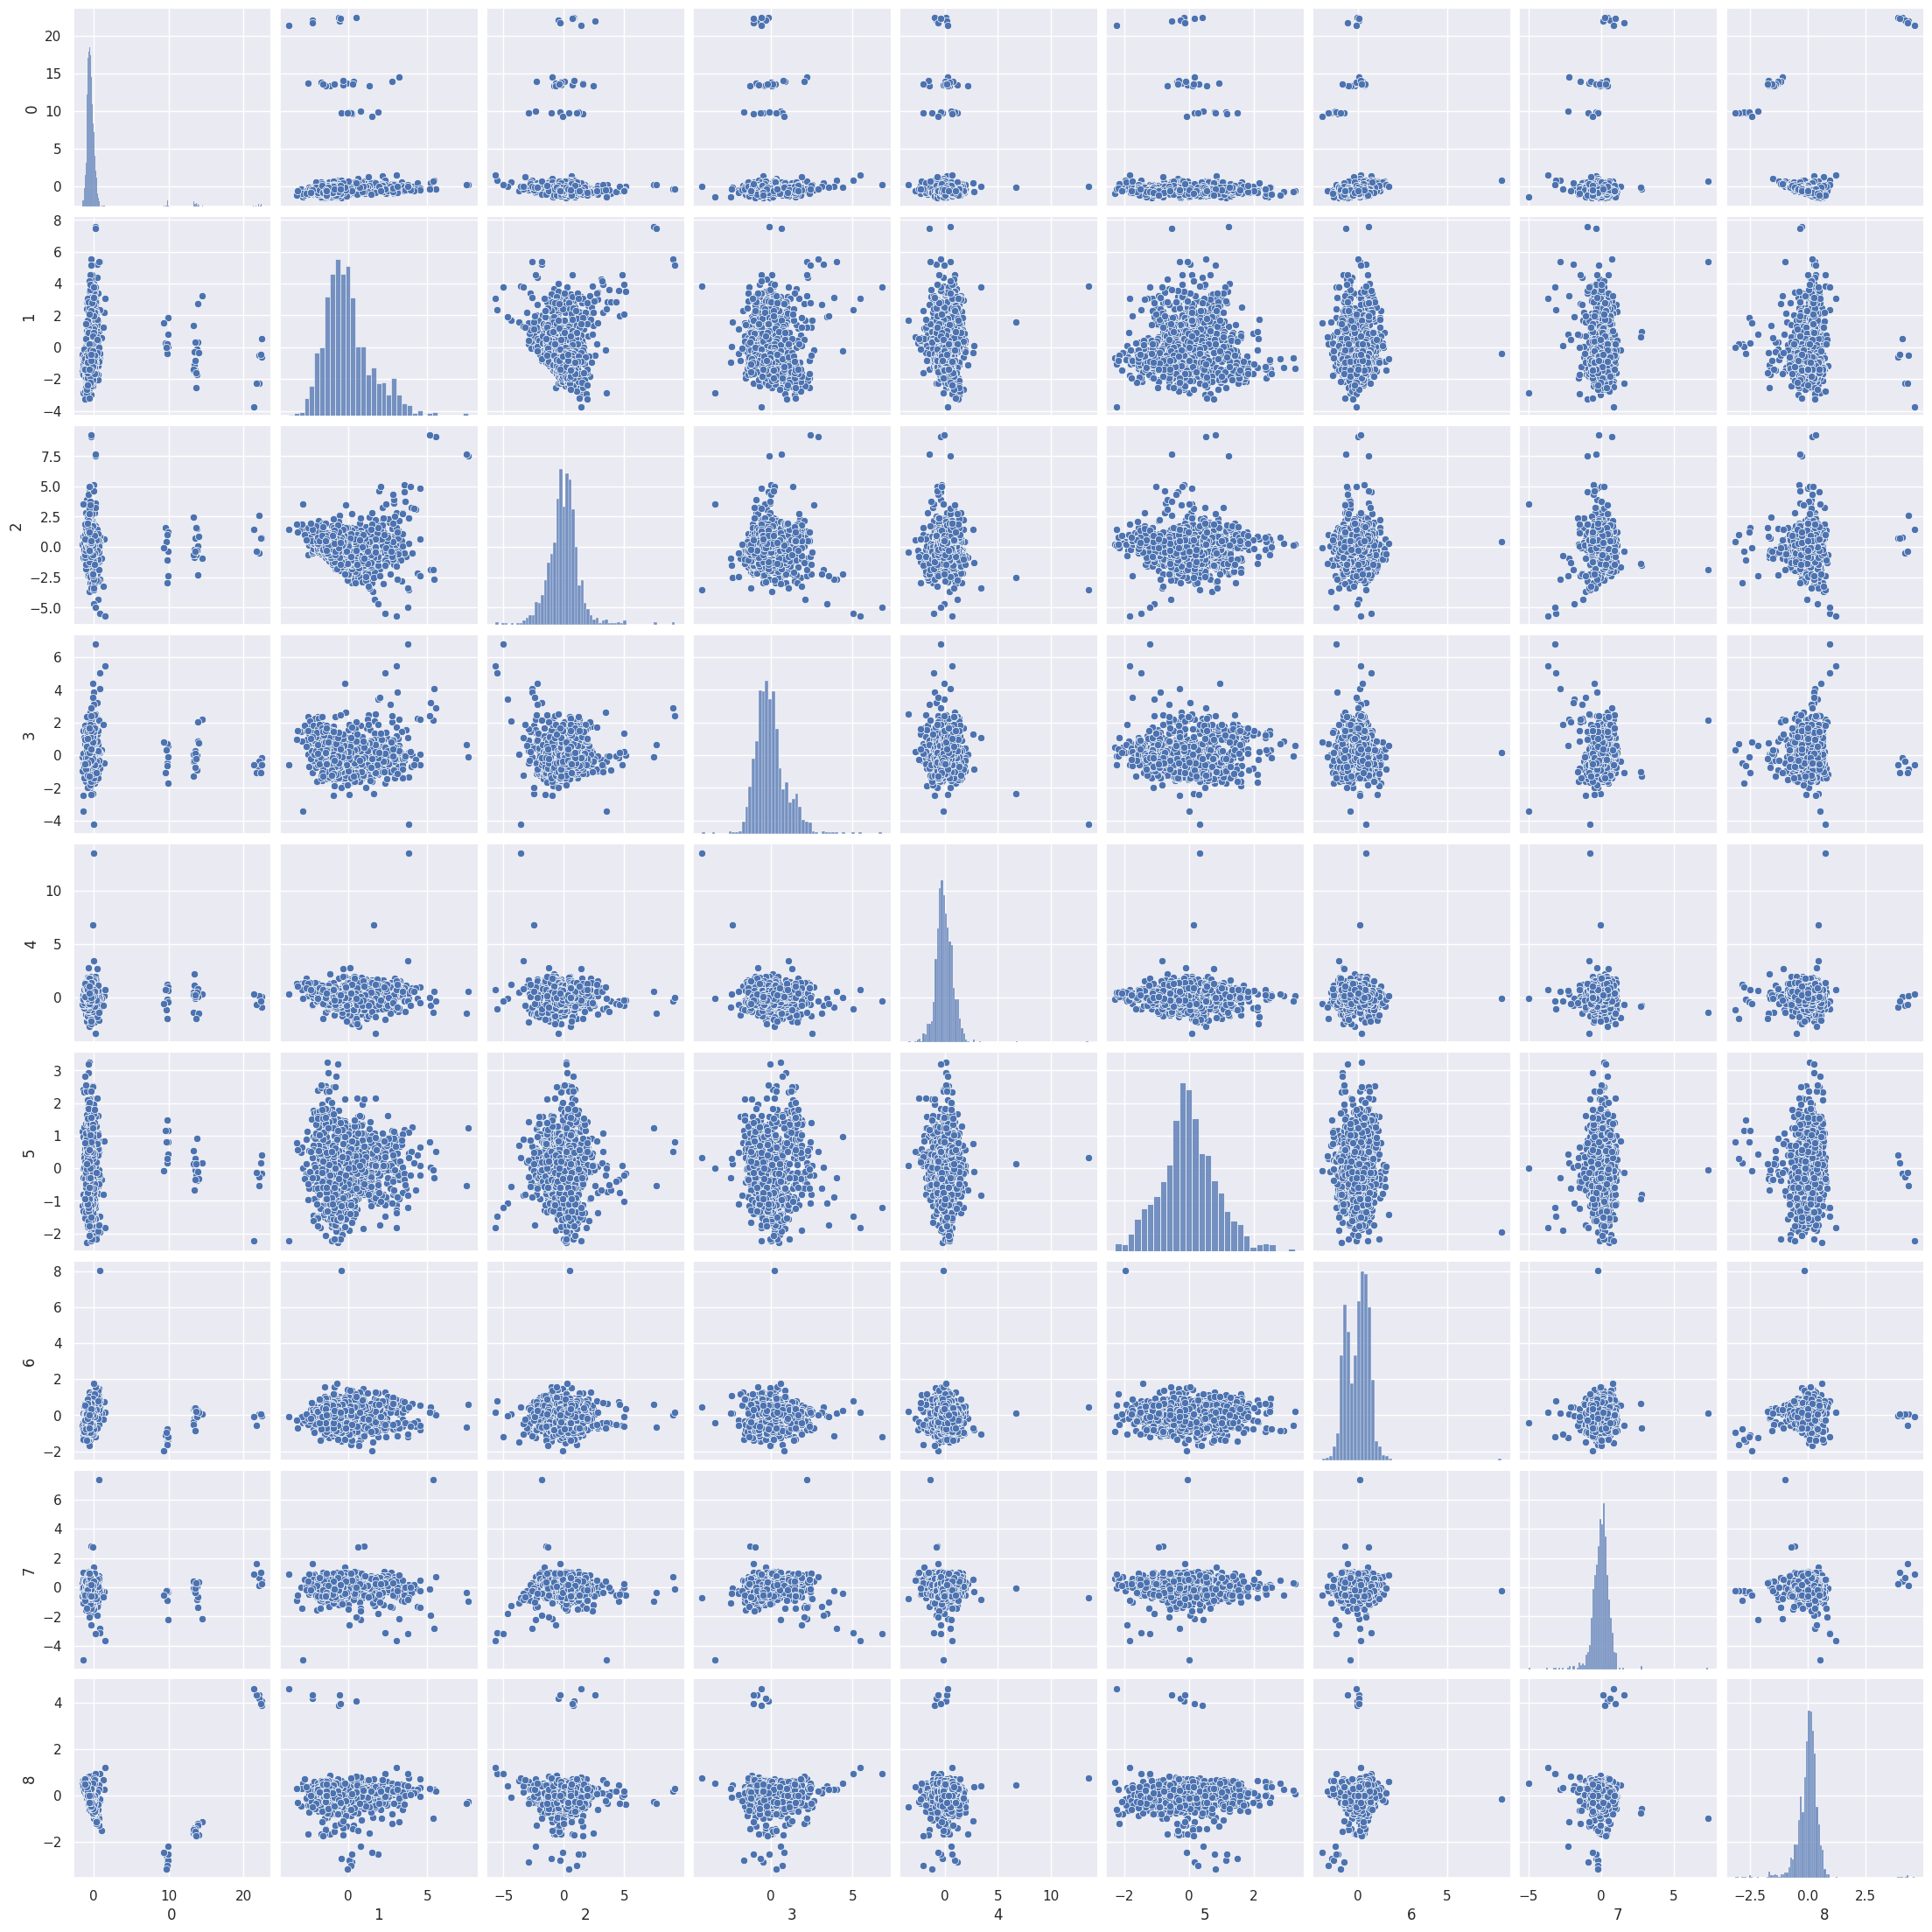

In [ ]:
sns.pairplot(pd.DataFrame(xpca))


In [ ]:
y=y.to_numpy()


In [ ]:
type(xpca)

numpy.ndarray

In [ ]:
print("Before UpSampling, counts of label '1': {}".format(sum(y==1)))
print("Before UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))


Before UpSampling, counts of label '1': [78]
Before UpSampling, counts of label '-1': [989] 



In [ ]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)
X_train_res, y_train_res = sm.fit_resample(xpca, y.ravel())


print("After UpSampling, counts of label '1': {}".format(sum(y==1)))
print("After UpSampling, counts of label '-1': {} \n".format(sum(y==-1)))



print('After UpSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_res.shape))


After UpSampling, counts of label '1': [78]
After UpSampling, counts of label '-1': [989] 

After UpSampling, the shape of train_X: (1978, 9)
After UpSampling, the shape of train_y: (1978,) 



In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size=0.30, random_state=5)
num_folds = 60
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = KNeighborsClassifier()
results = cross_val_score(model, X_train_res,y_train_res, cv=kfold)
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.90909091 0.93939394 0.75757576 0.96969697 0.87878788 0.90909091
 0.81818182 0.87878788 0.81818182 0.75757576 0.87878788 0.90909091
 0.84848485 0.93939394 0.93939394 0.87878788 0.87878788 0.90909091
 0.90909091 0.93939394 0.93939394 0.84848485 0.78787879 0.84848485
 0.93939394 0.90909091 0.84848485 0.84848485 0.87878788 0.87878788
 0.93939394 0.96969697 0.87878788 0.81818182 0.87878788 0.87878788
 0.96969697 0.87878788 0.96969697 0.90909091 0.90909091 0.87878788
 0.87878788 0.90909091 0.87878788 0.84848485 0.81818182 0.84848485
 0.84848485 0.87878788 0.84848485 0.90909091 0.84848485 0.84848485
 0.87878788 0.87878788 0.75757576 0.90909091 0.9375     0.875     ]
Accuracy: 88.122% (4.985%)


In [ ]:
param_grid = {'n_neighbors': list(range(1,9)),
             'algorithm': ('auto', 'ball_tree', 'kd_tree' , 'brute') }
gs = GridSearchCV(knn,param_grid,cv=10)



gs.fit( X_train, y_train)

print(" Best cross-validation accuracy: {:.2f}". format( gs.best_score_))
print(" Best parameters: ", gs.best_params_)
print(" Test set accuracy: {:.2f}". format( gs.score( X_test, y_test)))


 Best cross-validation accuracy: 0.92
 Best parameters:  {'algorithm': 'auto', 'n_neighbors': 2}
 Test set accuracy: 0.92


Testing the algorithm with test data (df3 - dataframe)


In [ ]:
x=df3.copy(deep=True)
x.drop(['Pass/Fail'],axis=1,inplace=True)
x=x[['59','103','510','348','431','434','430','21','435','28','436','210','129','298','163']]
y=df3[['Pass/Fail']]
print('No of rows in the data:', x.shape[0])
print('No of columns in the data:', x.shape[1])
print('No of rows in the data:', y.shape[0])
print('No of columns in the data:', y.shape[1])


No of rows in the data: 500
No of columns in the data: 15
No of rows in the data: 500
No of columns in the data: 1


In [ ]:
num_folds = 60
seed = 7

kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
model = KNeighborsClassifier(algorithm='auto',n_neighbors=2)
results = cross_val_score(model, x,y, cv=kfold)


In [ ]:
print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[1.         1.         0.88888889 1.         0.88888889 0.66666667
 0.88888889 1.         1.         1.         0.88888889 0.88888889
 1.         0.66666667 1.         0.88888889 1.         1.
 1.         1.         1.         0.875      0.875      1.
 1.         0.875      1.         0.75       1.         1.
 1.         0.75       1.         1.         1.         1.
 1.         0.75       1.         0.875      0.875      1.
 1.         1.         1.         1.         0.875      1.
 1.         1.         1.         1.         1.         0.875
 0.875      1.         0.875      1.         1.         0.875     ]
Accuracy: 94.444% (8.707%)


Observation Report:-

Training accuracy without Cross valdiation on train data : 88%

Valdiation accuracy without Cross valdiation on train data: 85%

Accuracy using Cross valdiation: 84%

Best parameters using Gridsearch before applying PCA :

'algorithm': 'auto',

'n_neighbors': 2

Train score: 89%,

Test score: 91%

After using PCA, accuracy using cross valdiation : 86%

The best parameters even after applying PCA still remains the same

Gridsearch accuracy for both train and valdation data : 92%

Cross validation score on test/production data using the best parameters : 94%



>





In [ ]:
!jupyter nbconvert --to html fmt.ipynb

[NbConvertApp] Converting notebook fmt.ipynb to html
[NbConvertApp] Writing 5520829 bytes to fmt.html
